In [133]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [134]:
dataF = pd.read_csv("sourceDataSet.csv", delimiter=";")
dataF.drop_duplicates()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Address,City,State,ZipCode,Latitude,Longitude,Comments,TotalGHGEmissions,GHGEmissionsIntensity,File Paths
0,1.0,2015.0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,6.590000e+08,"""{'latitude': '47.61219025'",'longitude': '-122.33799744',"'human_address': '{""""address"""": """"405 OLIVE WAY""""","""""city"""": """"SEATTLE""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-building-energy-benchmarking.csv
1,2.0,2015.0,NonResidential,Hotel,PARAMOUNT HOTEL,6.590002e+08,"""{'latitude': '47.61310583'",'longitude': '-122.33335756',"'human_address': '{""""address"""": """"724 PINE ST""""","""""city"""": """"SEATTLE""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-building-energy-benchmarking.csv
2,3.0,2015.0,NonResidential,Hotel,WESTIN HOTEL,6.590005e+08,"""{'latitude': '47.61334897'",'longitude': '-122.33769944',"'human_address': '{""""address"""": """"1900 5TH AVE""""","""""city"""": """"SEATTLE""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-building-energy-benchmarking.csv
3,5.0,2015.0,NonResidential,Hotel,HOTEL MAX,6.590006e+08,"""{'latitude': '47.61421585'",'longitude': '-122.33660889',"'human_address': '{""""address"""": """"620 STEWART ...","""""city"""": """"SEATTLE""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-building-energy-benchmarking.csv
4,8.0,2015.0,NonResidential,Hotel,WARWICK SEATTLE HOTEL,6.590010e+08,"""{'latitude': '47.6137544'",'longitude': '-122.3409238',"'human_address': '{""""address"""": """"401 LENORA ST""""","""""city"""": """"SEATTLE""""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-building-energy-benchmarking.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,50222.0,2016.0,Nonresidential COS,Office,Horticulture building,1.624049e+09,NaN,2,GREATER DUWAMISH,1990,...,1600 S Dakota St,Seattle,WA,NaN,"47,56722","-122,31154",NaN,"20,94","1,7",2016-building-energy-benchmarking.csv
6801,50223.0,2016.0,Nonresidential COS,Other,International district/Chinatown CC,3.558300e+09,NaN,2,DOWNTOWN,2004,...,719 8th Ave S,Seattle,WA,NaN,"47,59625","-122,32283",NaN,"32,17","2,01",2016-building-energy-benchmarking.csv
6802,50224.0,2016.0,Nonresidential COS,Other,Queen Anne Pool,1.794501e+09,NaN,7,MAGNOLIA / QUEEN ANNE,1974,...,1920 1st Ave W,Seattle,WA,NaN,"47,63644","-122,35784",NaN,"223,54","16,99",2016-building-energy-benchmarking.csv
6803,50225.0,2016.0,Nonresidential COS,Mixed Use Property,South Park Community Center,7.883603e+09,NaN,1,GREATER DUWAMISH,1989,...,8319 8th Ave S,Seattle,WA,NaN,"47,52832","-122,32431",NaN,"22,11","1,57",2016-building-energy-benchmarking.csv


In [149]:
nonNullRate = []
for col in dataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(dataF[col].dtypes) ,"filledRatio": round((dataF[col].count()/dataF.shape[0])*100, 3), "nbValues": dataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 10]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))
moreThanOnePercentColumns

,columns,type,filledRatio,nbValues
0,OSEBuildingID,float64,98.692,3432
1,DataYear,float64,98.692,2
2,BuildingType,object,100.000,96
3,PrimaryPropertyType,object,100.000,120
4,PropertyName,object,98.692,6537
...,...,...,...,...
78,Latitude,float64,100.000,1
79,Longitude,float64,100.000,1
81,TotalGHGEmissions,object,49.478,2818
82,GHGEmissionsIntensity,object,49.478,511


In [150]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6805 entries, 0 to 6804
Data columns (total 84 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  6716 non-null   float64
 1   DataYear                                                       6716 non-null   float64
 2   BuildingType                                                   6805 non-null   object 
 3   PrimaryPropertyType                                            6805 non-null   object 
 4   PropertyName                                                   6716 non-null   object 
 5   TaxParcelIdentificationNumber                                  6599 non-null   float64
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [137]:
# a lot of columns seems to be string but should be float or integer in fact 
#let's change that. 
nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]


In [138]:
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
listToChange = listToChange + ["Latitude", "Longitude", "ZipCode", "ENERGYSTARScore"]
#listToChange = listToChange.append(list(CO2Columns['columns'].values))#.append(list(kbtusColumns['columns'].values))

In [139]:
for column in listToChange:
    dataF[column] = pd.to_numeric(dataF[column], errors='coerce')
    #dataF[column] = dataF[column].replace(np.nan, 0)

In [163]:
#Let's keep only EnergyScore with value <= 100
cleanDataF = dataF[dataF["ENERGYSTARScore"] <= 100]
cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScore"]
f = lambda x: "red" if x<25 else x
cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].map(f)
print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
cleanDataF["ENERGYSTARScoreColor"] = np.where(cleanDataF["ENERGYSTARScoreColor"]<25, "red", cleanDataF["ENERGYSTARScoreColor"])
print(np.unique(cleanDataF["ENERGYSTARScoreColor"].values))
cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 25 & cleanDataF["ENERGYSTARScoreColor"] <= 75 , 'yellow']
cleanDataF.loc[cleanDataF["ENERGYSTARScoreColor"] > 75 & cleanDataF["ENERGYSTARScoreColor"] <= 100 , 'green']
cleanDataF

<ipython-input-163-127177793527>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScore"]
<ipython-input-163-127177793527>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScoreColor"].map(f)


TypeError: '<' not supported between instances of 'str' and 'float'

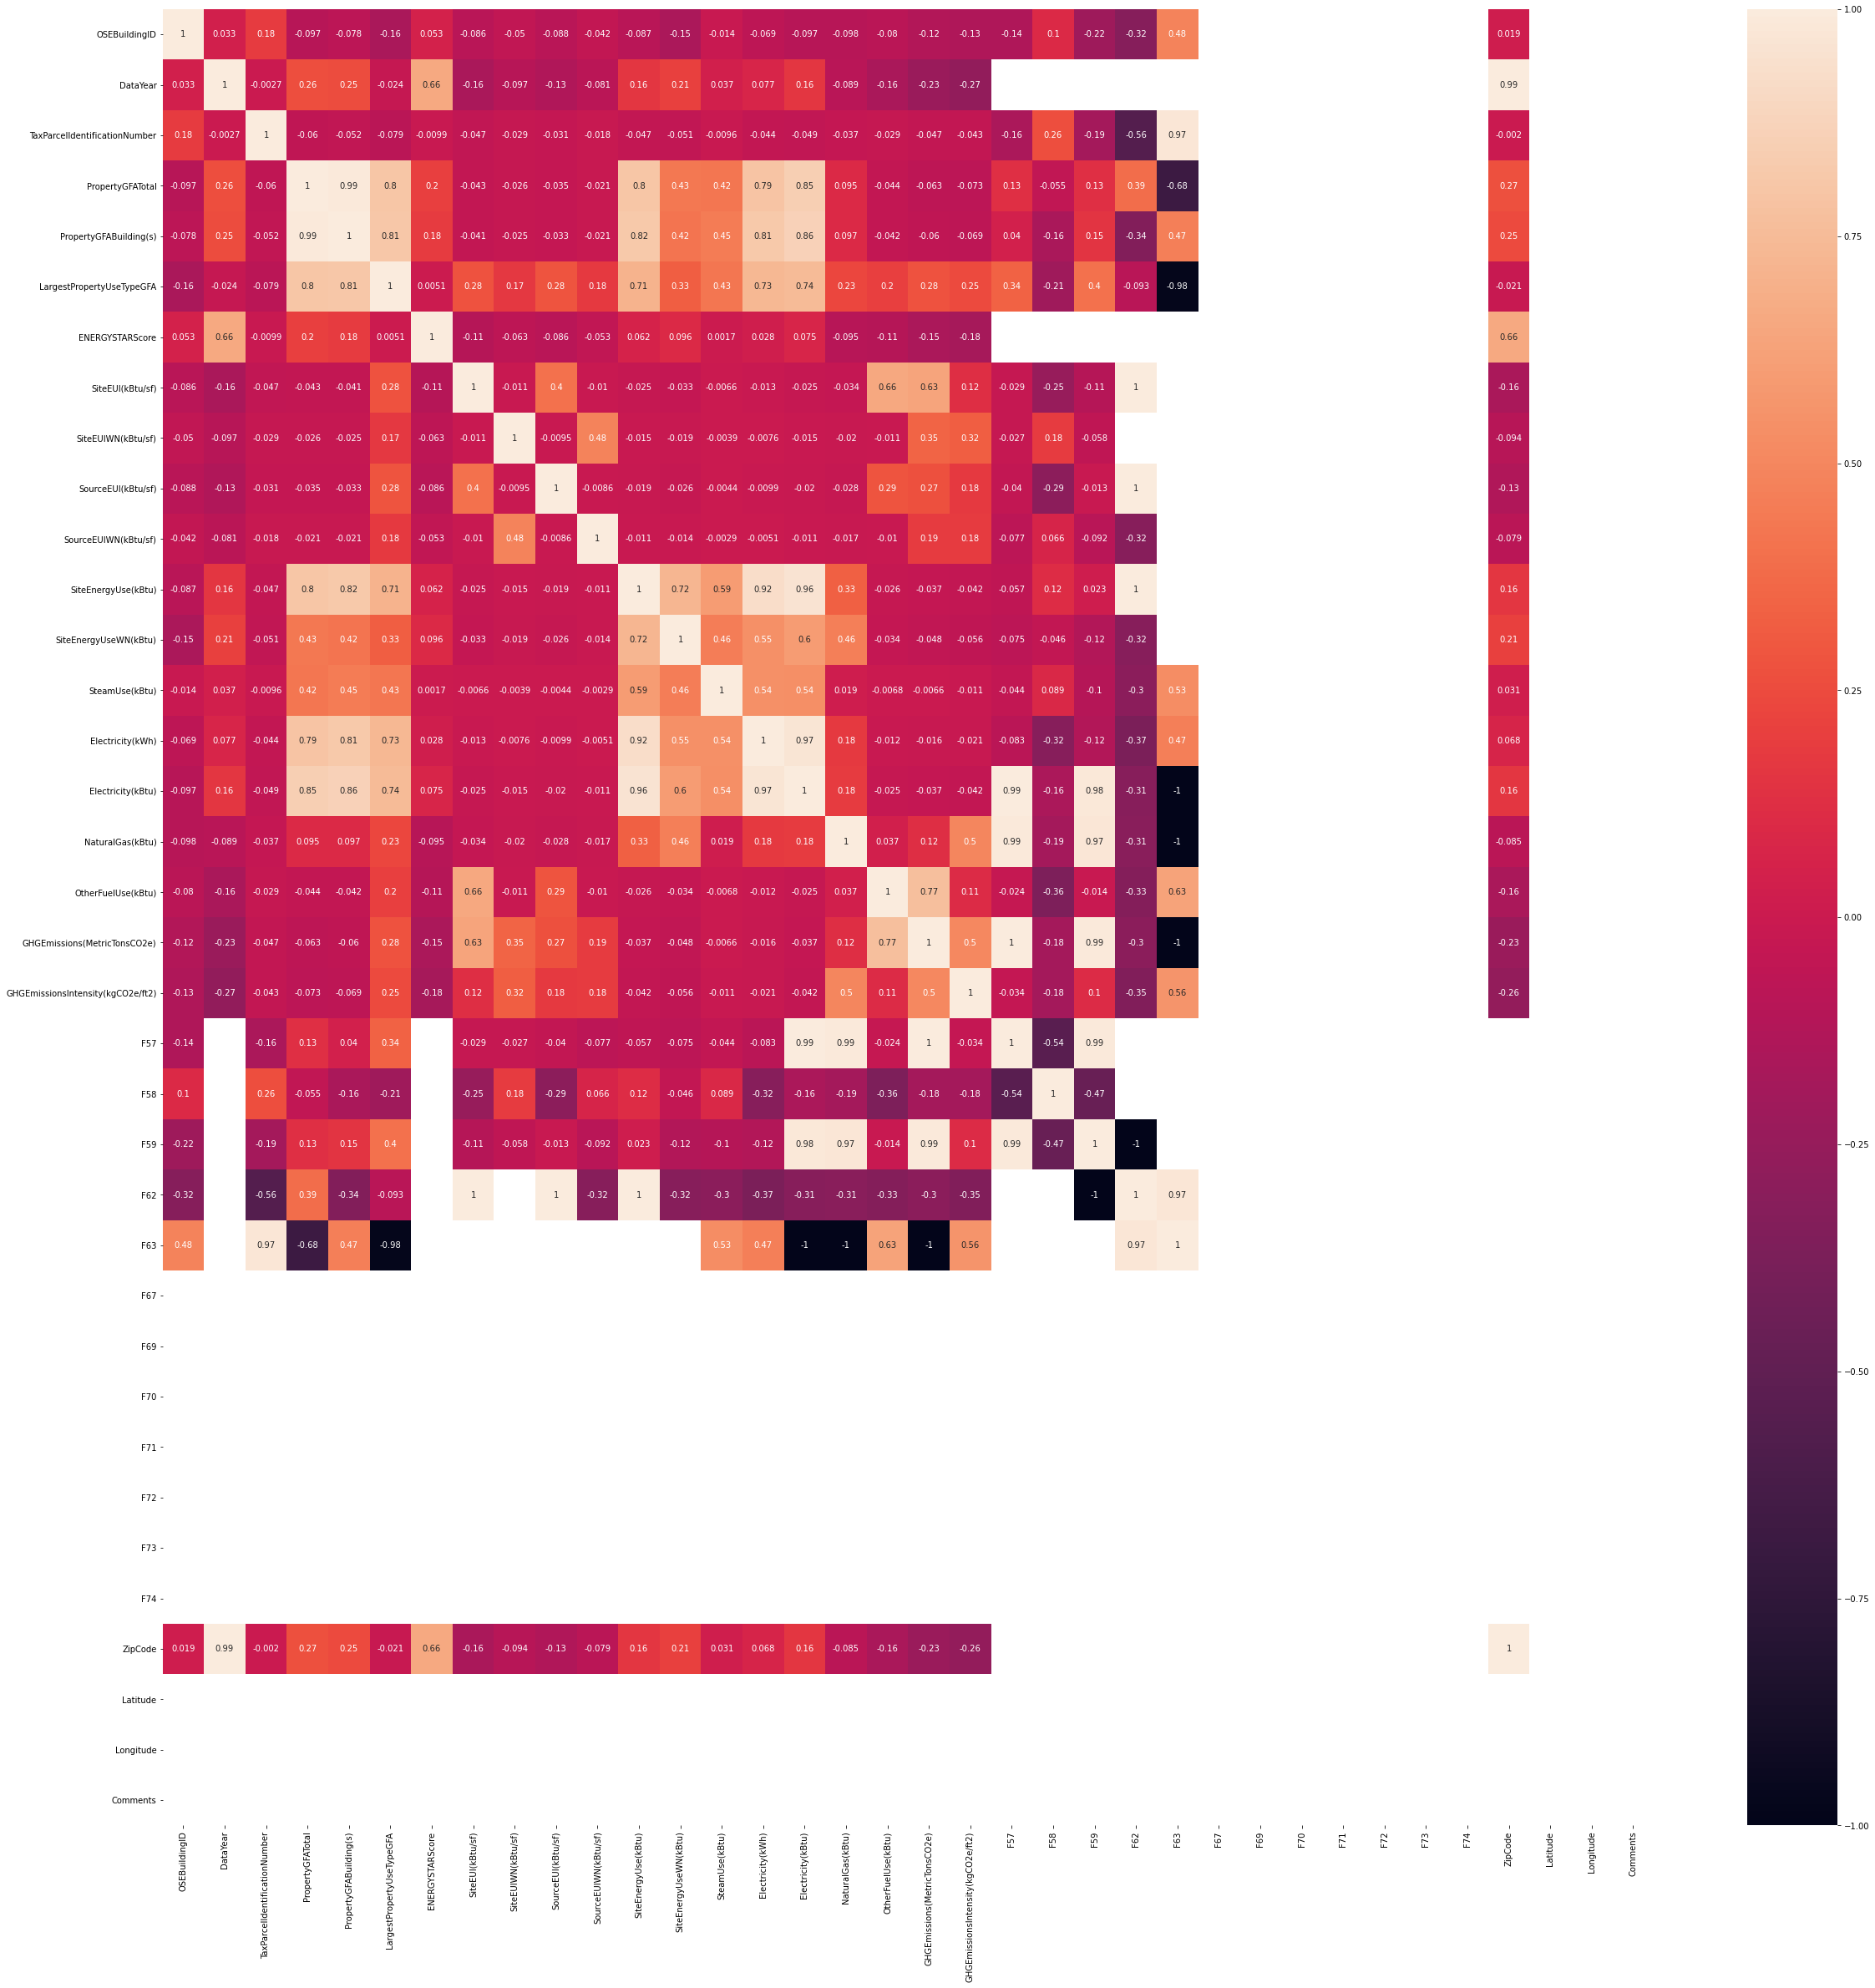

In [146]:
#correlations = dataF.corr(method="kendall")
#correlations = dataF.corr(method="spearman")
correlations = cleanDataF.corr()
f, ax = plt.subplots(figsize = (40, 40))
#regarder la distance par défault dans heatmap
figure = sns.heatmap(correlations, annot = True).get_figure()
figure.savefig("./Visuals/originalDFheatmap.jpg")


/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2

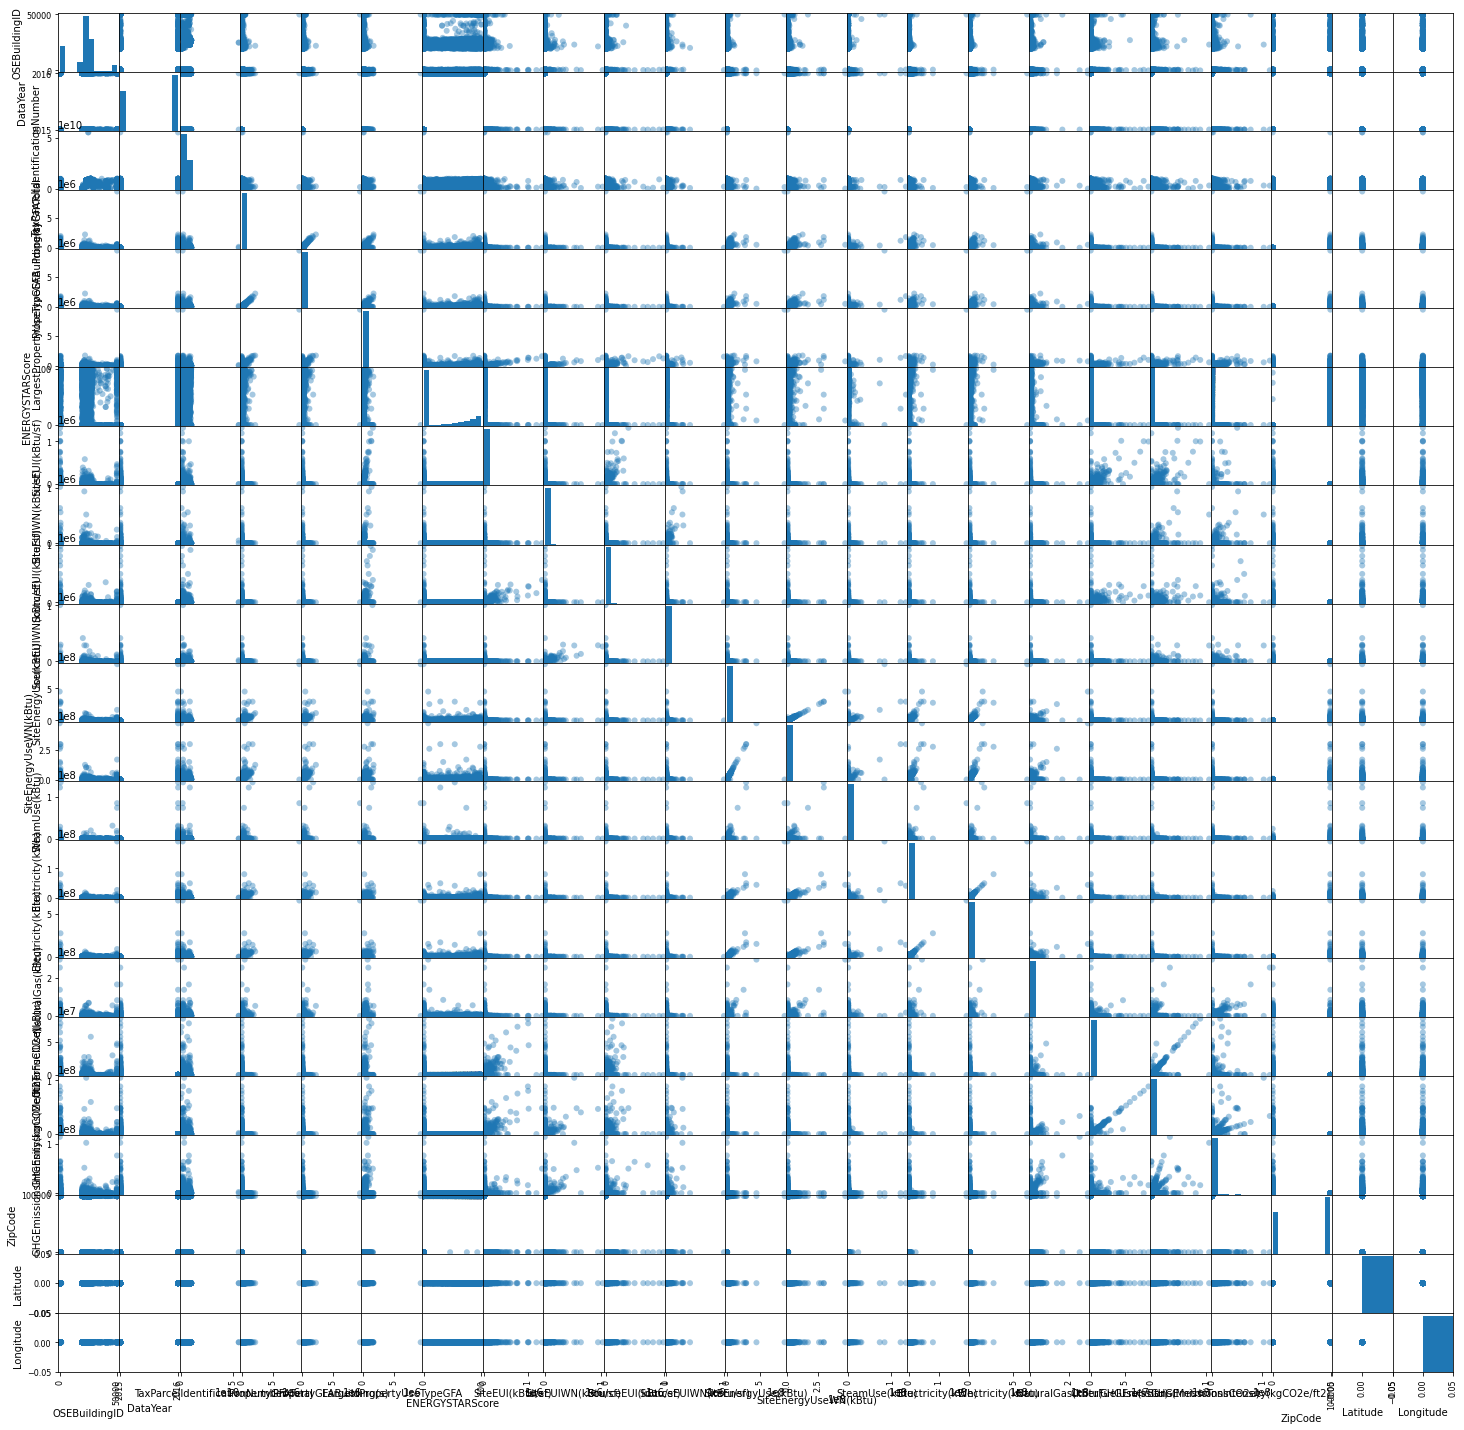

In [151]:
g = pd.plotting.scatter_matrix(cleanDataF.filter(items=list(moreThanOnePercentColumns["columns"].values)), figsize=(25,25),  marker = '°',  alpha = 0.4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()